Ensemble Learning, means that we take multiple algo and combine them to form a new bigger algorithm. Similarly, Random forest takes into acc, several Decision trees.

Step 1: Pick k random data point from the training set.

Step 2: Build Decision tree assciated to these K data points.

Step 3: Choose the no. Ntree of trees you want to build and repeat steps 1 and 2

Step 4: For a new data point, make each one of your Ntree predict which category to data point belongs, and assign the new data point to the category that wins the majority votes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Social_Network_Ads.csv')
df.head()
x = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

#splitting the dataset
from sklearn.cross_validation import train_test_split
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.25, random_state = 0)

#feature scaling the data
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
trainx = scx.fit_transform(trainx)
testx = scx.transform(testx)

/home/tushar/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/tushar/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [2]:
from sklearn.ensemble import RandomForestClassifier
reg = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model = reg.fit(trainx, trainy)

In [3]:
from sklearn.metrics import confusion_matrix
predy = model.predict(testx)
cm = confusion_matrix(testy, model.predict(testx))
pd.DataFrame(cm)

,0,1
0,63,5
1,3,29


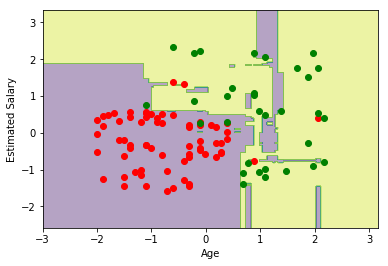

In [4]:
from matplotlib.colors import ListedColormap
x_set = testx
y_set = testy
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step = 0.01)
                    ,np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max()+1, step = 0.01))


plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.4)
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
x_setd = pd.DataFrame(x_set)
x_p = x_setd.loc[(y_set ==0), :].values
x_n = x_setd.loc[(y_set ==1), :].values



plt.scatter(x_p[:, 0], x_p[:, 1], color = 'red')
plt.scatter(x_n[:, 0], x_n[:, 1], color = 'green')

plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

/home/tushar/.local/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


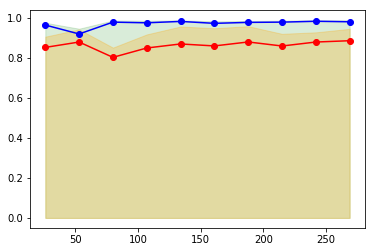

In [5]:
from sklearn.learning_curve import learning_curve
train_size, train_scores, test_scores = learning_curve(estimator = model, X = trainx, y = trainy, train_sizes = np.linspace(0.1, 1, 10), cv =10, n_jobs = 1)
train_mean = np.mean(train_scores, axis =1)
train_std = np.std(train_scores, axis =1)
test_mean = np.mean(test_scores, axis =1)
test_std = np.std(test_scores, axis =1)
plt.plot(train_size, train_mean, color = 'blue', marker = 'o')
plt.fill_between(train_size, train_mean + train_std, alpha = 0.15, color = 'green')

plt.plot(train_size, test_mean, color = 'red', marker = 'o')
plt.fill_between(train_size, test_mean + test_std, alpha = 0.25, color = 'orange')


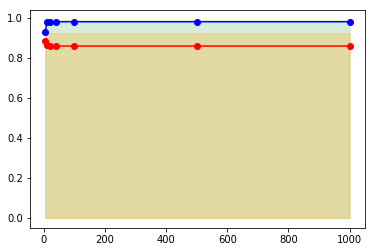

In [15]:
from sklearn.learning_curve import validation_curve
p_range = [5, 10, 20, 40, 100, 500, 1000]
train_scores, test_scores = validation_curve(estimator = model, X = trainx, y = trainy, 
                                             param_name = 'max_depth', 
                                             param_range = p_range, cv =10, n_jobs = 1)



train_mean = np.mean(train_scores, axis =1)
train_std = np.std(train_scores, axis =1)
test_mean = np.mean(test_scores, axis =1)
test_std = np.std(test_scores, axis =1)
plt.plot(p_range, train_mean, color = 'blue', marker = 'o')
plt.fill_between(p_range, train_mean + train_std, alpha = 0.15, color = 'green')

plt.plot(p_range, test_mean, color = 'red', marker = 'o')
plt.fill_between(p_range, test_mean + test_std, alpha = 0.25, color = 'orange')
